In [8]:
!pip install git+https://github.com/robertmartin8/PyPortfolioOpt.git

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Cloning https://github.com/robertmartin8/PyPortfolioOpt.git to /private/var/folders/6x/y593fjms3yx0y03xhk_6szjw0000gn/T/pip-req-build-c7fj9gpp
  Running command git clone --filter=blob:none --quiet https://github.com/robertmartin8/PyPortfolioOpt.git /private/var/folders/6x/y593fjms3yx0y03xhk_6szjw0000gn/T/pip-req-build-c7fj9gpp
  Resolved https://github.com/robertmartin8/PyPortfolioOpt.git to commit 30ab57147ba61eddc8301294a5b1c5ef260b23fa
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for cvxpy<2.0.0,>=1.1.19 from https://files.pythonhosted.org/packages/29/87/1f5479f431c89efe9ec05e202f6f1c80bc1ca07b1e09022d

In [19]:
import yfinance as yf
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
import matplotlib.pyplot as plt
import pandas as pd


file_path = 'constituents.csv'
table = pd.read_csv(file_path)

stocks = table['Symbol'].tolist()

data = pd.DataFrame()
for stock in stocks:
    ticker_data = yf.Ticker(stock)
    ticker_data = ticker_data.history(period="10y")['Close']
    data[stock] = ticker_data

data.tail()

BRK.B: No data found, symbol may be delisted
BF.B: No data found for this date range, symbol may be delisted


/var/folders/6x/y593fjms3yx0y03xhk_6szjw0000gn/T/ipykernel_4693/3313144470.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[stock] = ticker_data
/var/folders/6x/y593fjms3yx0y03xhk_6szjw0000gn/T/ipykernel_4693/3313144470.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[stock] = ticker_data
/var/folders/6x/y593fjms3yx0y03xhk_6szjw0000gn/T/ipykernel_4693/3313144470.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance

GD: No data found for this date range, symbol may be delisted


/var/folders/6x/y593fjms3yx0y03xhk_6szjw0000gn/T/ipykernel_4693/3313144470.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[stock] = ticker_data
/var/folders/6x/y593fjms3yx0y03xhk_6szjw0000gn/T/ipykernel_4693/3313144470.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data[stock] = ticker_data
/var/folders/6x/y593fjms3yx0y03xhk_6szjw0000gn/T/ipykernel_4693/3313144470.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance

,MMM,AOS,ABT,ABBV,ACN,ATVI,ADM,ADBE,ADP,AAP,...,WTW,GWW,WYNN,XEL,XYL,YUM,ZBRA,ZBH,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2023-08-02 00:00:00-04:00,108.910004,72.589996,108.620003,149.380005,317.779999,91.629997,84.790001,530.299988,247.360001,69.639999,...,213.160004,721.750000,105.160004,62.880001,112.080002,135.000000,241.149994,128.380005,36.630001,182.000000
2023-08-03 00:00:00-04:00,107.190002,72.300003,107.540001,149.050003,317.130005,91.680000,84.970001,523.760010,248.000000,72.029999,...,213.789993,722.880005,105.610001,61.320000,108.400002,135.619995,249.550003,125.790001,37.410000,180.880005
2023-08-04 00:00:00-04:00,105.510002,72.639999,107.650002,147.729996,312.000000,91.580002,85.550003,526.880005,245.759995,71.010002,...,212.759995,708.270020,104.180000,60.389999,105.669998,134.350006,251.410004,126.320000,37.919998,178.630005
2023-08-07 00:00:00-04:00,105.230003,73.839996,108.449997,150.330002,315.869995,91.570000,87.209999,529.729980,250.820007,71.300003,...,211.600006,717.250000,105.029999,59.759998,106.959999,135.110001,248.229996,125.629997,38.139999,180.690002
2023-08-08 00:00:00-04:00,103.199997,72.639999,103.977303,149.365005,311.774994,91.605003,85.680000,517.155029,247.899994,70.720001,...,205.820007,713.109985,103.165001,59.259998,105.195000,133.339996,251.910004,123.550003,37.235001,186.720001


In [26]:
data.dropna(axis=1, inplace=True)

mu = expected_returns.mean_historical_return(data)

S = risk_models.sample_cov(data)

In [27]:
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()
print(cleaned_weights)
ef.portfolio_performance(verbose=True)

OrderedDict([('MMM', 0.0), ('AOS', 0.0), ('ABT', 0.0), ('ABBV', 0.0), ('ACN', 0.0), ('ATVI', 0.0), ('ADM', 0.0), ('ADBE', 0.0), ('ADP', 0.0), ('AAP', 0.0), ('AES', 0.0), ('AFL', 0.0), ('A', 0.0), ('APD', 0.0), ('AKAM', 0.0), ('ALK', 0.0), ('ALB', 0.0), ('ARE', 0.0), ('ALGN', 0.0), ('LNT', 0.0), ('ALL', 0.0), ('GOOGL', 0.0), ('GOOG', 0.0), ('MO', 0.0), ('AMZN', 0.0), ('AMCR', 0.0), ('AMD', 0.0), ('AEE', 0.0), ('AAL', 0.0), ('AEP', 0.0), ('AXP', 0.0), ('AIG', 0.0), ('AMT', 0.0), ('AWK', 0.0), ('AMP', 0.0), ('ABC', 0.0), ('AME', 0.0), ('AMGN', 0.0), ('APH', 0.0), ('ADI', 0.0), ('ANSS', 0.0), ('AON', 0.0), ('APA', 0.0), ('AAPL', 0.0), ('AMAT', 0.0), ('APTV', 0.0), ('ACGL', 0.0), ('AJG', 0.0), ('AIZ', 0.0), ('T', 0.0), ('ATO', 0.0), ('ADSK', 0.0), ('AZO', 0.0), ('AVB', 0.0), ('AVY', 0.0), ('AXON', 0.01197), ('BKR', 0.0), ('BALL', 0.0), ('BAC', 0.0), ('BBWI', 0.0), ('BAX', 0.0), ('BDX', 0.0), ('WRB', 0.0), ('BBY', 0.0), ('BIO', 0.0), ('TECH', 0.0), ('BIIB', 0.0), ('BLK', 0.0), ('BK', 0.0), (

(0.3473353740290908, 0.20251798919912062, 1.6163273955245856)

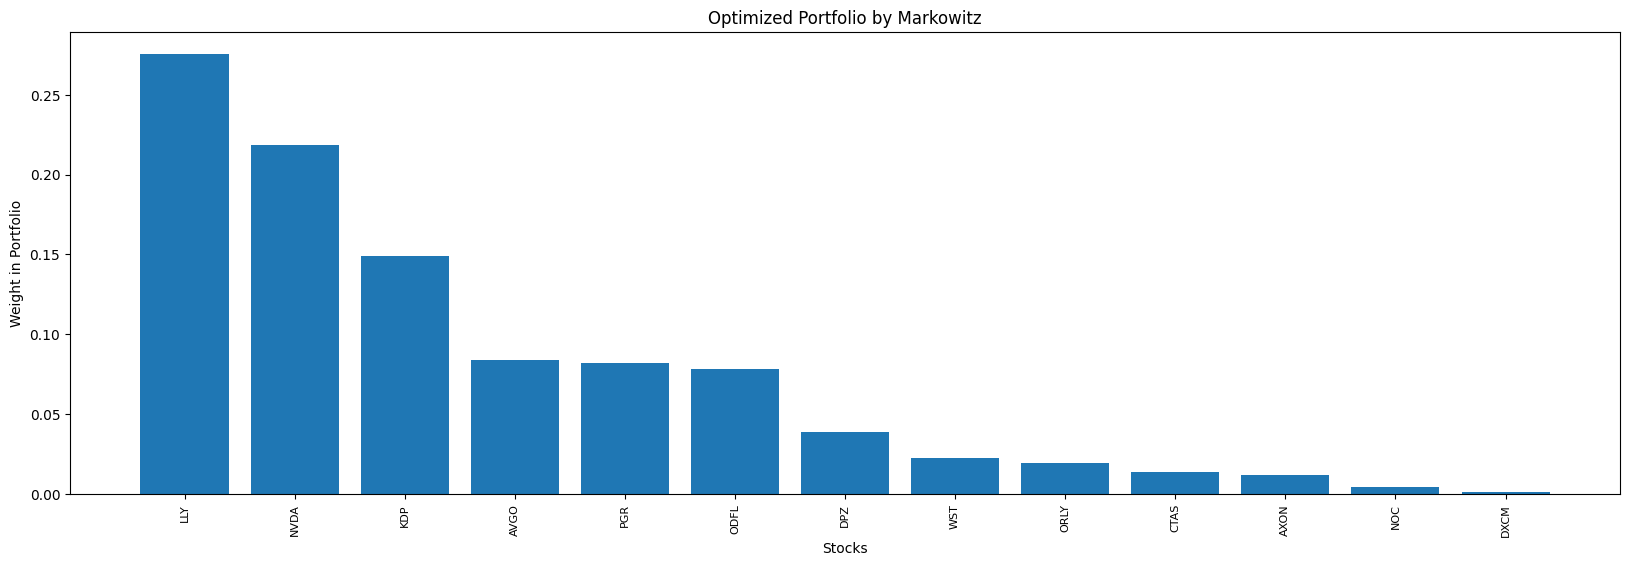

{'LLY': 0.27551,
 'NVDA': 0.21844,
 'KDP': 0.14877,
 'AVGO': 0.08388,
 'PGR': 0.08214,
 'ODFL': 0.0785,
 'DPZ': 0.03911,
 'WST': 0.02256,
 'ORLY': 0.01924,
 'CTAS': 0.01399,
 'AXON': 0.01197,
 'NOC': 0.00439,
 'DXCM': 0.00151}

In [31]:
plt.figure(figsize=(20, 6))

sorted_weights = {k: v for k, v in sorted(cleaned_weights.items(), key=lambda item: item[1], reverse=True)}

non_zero_weights = {k: v for k, v in sorted_weights.items() if v != 0}

plt.bar(non_zero_weights.keys(), non_zero_weights.values())
plt.xlabel('Stocks')
plt.ylabel('Weight in Portfolio')
plt.title('Optimized Portfolio by Markowitz')

plt.xticks(rotation=90)

plt.tick_params(axis='x', which='major', labelsize=8)

plt.show()

non_zero_weights
